In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use({'figure.facecolor':'white'})


In [9]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [10]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Посмотрим на количество дождливых и недождливых дней:

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

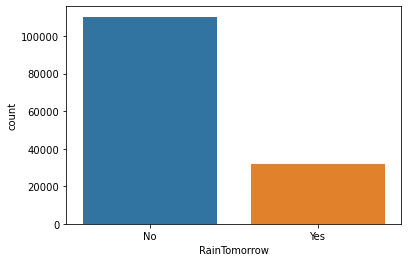

In [11]:
sns.countplot(data=weather_data, x='RainTomorrow')

Видим, что количество недождливых дней гораздо больше, чем дождливых.

Посмотрим на гистограммы распрееделений количественных признаков:

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RISK_MM'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

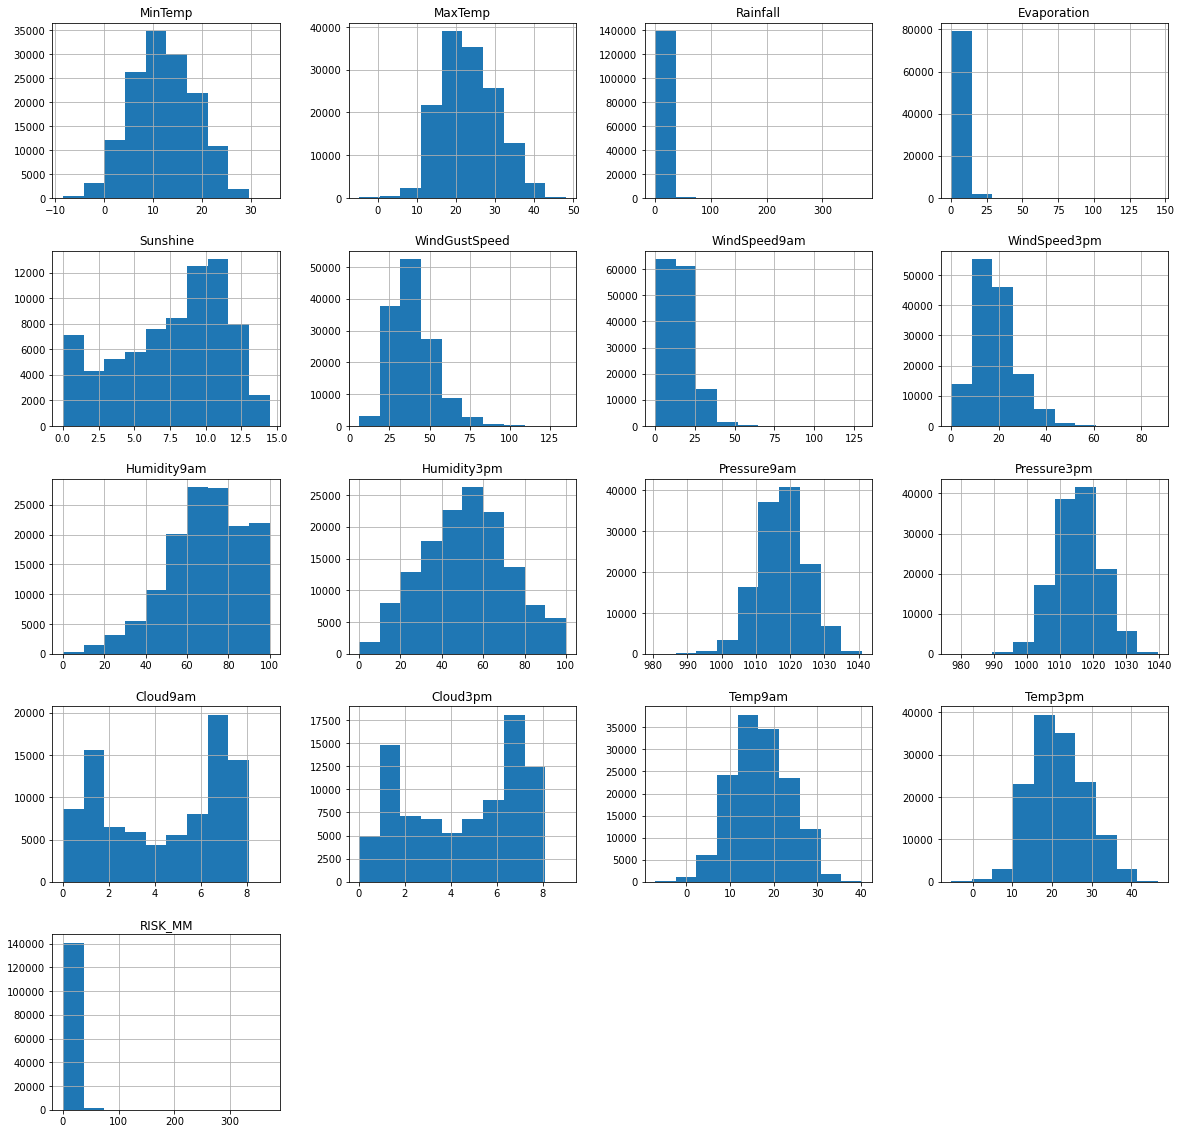

In [12]:
weather_data.hist(figsize=(20,20))

Видим, что показатели количества осадков и испарений *Rainfall*, *Evaporation*, сильно смещенны к нулю, что в целом
логично, так как большинство дней недождливых, тем не менее наблюдаем очень тяжелые хвосты справа, хотя аномально
дождливые периоды все таки возможны.

В признаках скорости ветров *WindGust#* также видны хвосты справа, причем значения
выше ста выглядят совсем неестественно.

В признаках влажности *Humidity#* можно заметить, что влажность в 9 утра имеет явную асимметрию вправую сторону, что
логично, так как влажность утром обычно выше влажности днём. Влажность же в 3 дня имеет нормальное распределение.

Признаки облачности *Cloud#* имеют два пика в 1 октанте и в 7-ой октанте, что может говорить о том, что имеют место быть
два нормальных распределения для пасмурных и янсых дней со выборочным средним в 1-ой и 7-ой октанте.

Температурные признаки в целом распределены нормально.

Немножко кажутся неественными высокие значения в районе нуля у *Rainfall*, так как буквально абсолютное большинство
наблюдений в этом распределении находится в районе нуля,но количество дождливых дней по первой дистограмме все таки
в районе 30 тыс.

Построим для наглядности логарифм признака, логарифм не смещает моду распределения, но масштабирует его,
и будет легче визуально анализировать.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

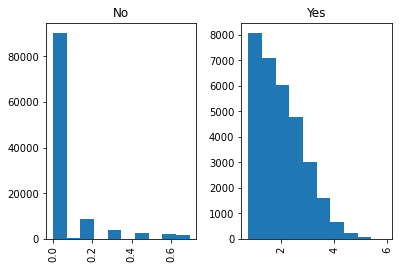

In [13]:
np.log1p(weather_data.Rainfall).hist(by=weather_data['RainToday'])

Теперь стало яснее видно, что большинство значений у дождливых дней все таки больше нуля, в отличие от недождливых дней.
Посмотрим на описание этого распределения:

In [14]:
weather_data[(weather_data['RainToday']=='Yes')].Rainfall.describe()

count    31455.000000
mean        10.256732
std         15.495105
min          1.100000
25%          2.400000
50%          5.200000
75%         11.800000
max        371.000000
Name: Rainfall, dtype: float64

Действительно, значения концентрируются в основном в районе [1, 12] мм суточных осадков, в то время как присутствуют
аномальные дни, которые на самом деле и не похожи на правду, учитывая что 300 мм спокойно может быть квартальной нормой,
хотя сейчас прочел в википедии, что на острове Реюньон был установлен мировой рекорд по суточным осадкам - 1870 мм.

Чтоб окончательно разобраться с этим признаком, построим boxplot:

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

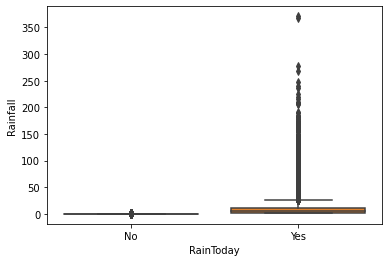

In [15]:
sns.boxplot(data=weather_data, y='Rainfall', x='RainToday')

Построим такие же гистограммы для *Evaporation*

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

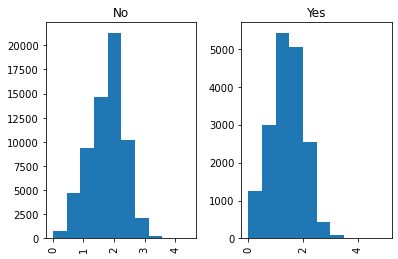

In [16]:
np.log1p(weather_data.Evaporation).hist(by=weather_data['RainToday'])

Видим, что выборочное среднее количества испарений для сухих дней смещено правее относительно такого же распределения для
дождливых дней, в целом, распределения логарифмов этих величин можно даже назвать нормальными с довольно маленькой дисперсией,
и довольно значимыми различиями в средних (проверку на статистическую значимость этой гипотезы я делать конечно же не буду)

Но построим барплот с значениями испарения, на данной дистограмме для дождливых и сухих дней показаны средние
значения логарифма испарений, и для каждой из этих выборок был расчитан доверительный интервал для среденего методом
бутстрэпа.

* Метод бутстрэпа состоит в том, что мы, убедившись в репрезентативности нашей выборки, воспринимаем наше распределние
как генеральную совокупность, из которой заранее определенное количество раз (в нашем случае 1000 раз) мы вынимаем
случайным образом новые выборки, "вынутое" значение не удаляется из выборки и может быть "вынуто" сколько угодно раз.
Далее, для каждой из получившихся выборок мы определяем выборочное среднее, строим гистограмму распределения выборочных
средних, и определяем доверительный интервал данного распределения. Вообще этот метод напоминает ЦПТ только на уровень
ниже, получается.

<AxesSubplot:xlabel='RainToday', ylabel='Evaporation'>

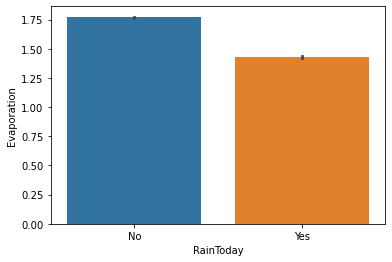

In [17]:
sns.barplot(y=np.log1p(weather_data.Evaporation), x=weather_data.RainToday)

Как видно из этой дистограммы, доверительные интервалы средних не пересекаются, что может говорить нам о статистической
значимости различий в этих двух выборках.

Посмотрим на распределения облачности в зависимости от того, шел ли в этот день дождь, ранее мы выдвинули гипотезу, что
в солнечные дни распределение облачности нормально со средним в 1-ом октанте,а в пасмурные со средним в 7-ом октанте.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

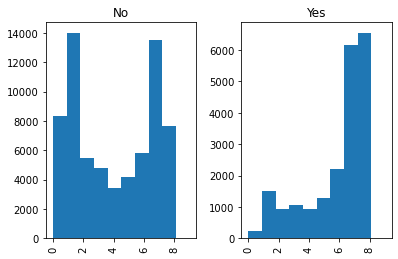

In [18]:
weather_data.Cloud9am.hist(by=weather_data['RainToday'])

Распределение было разбито на дождилвые и недождливые дни, для дождливых дней интуитивно справедливо, что распределение
смещено в сильную облачность, для недождливых, к сожалению, обратное не верно, бывают недождливые пасмурные дни, поэтому
бимодальность распределения сохраняется, но корректность данных все таки подтверждается.

Ну и для окончательной проверки создадим новый признак на основе признака количества солнечных часов *Sunshine*,
где значение Sun принимают те измерение, когда количество солнечных часов было больше 8, а Cloudy меньше.

In [19]:
sun = weather_data.Sunshine.apply(lambda x: 'Sun' if x > 8 else 'Cloudy')

array([<AxesSubplot:title={'center':'Cloudy'}>,
       <AxesSubplot:title={'center':'Sun'}>], dtype=object)

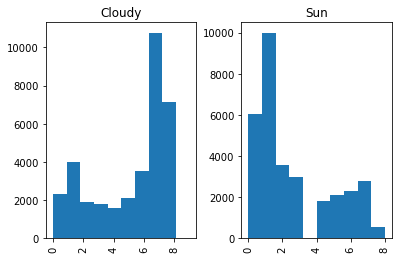

In [20]:
weather_data[weather_data['RainToday']=='No'].Cloud9am.hist(by=sun)

Видим, что бимодальность распределения разбилась на два унимодальных распределения с ожидаемыми значениями в пике
облачности для малосолнечных дней и в пике малооблачности для многосолнечных дней.

На последок построим дистограмму частоты количества солнечных часов в зависимости от октант облачности:

<AxesSubplot:xlabel='Cloud3pm', ylabel='Sunshine'>

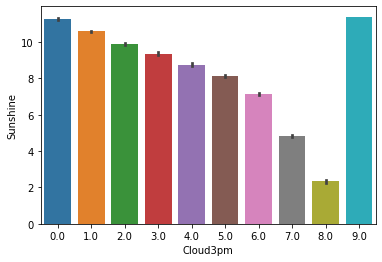

In [21]:
sns.barplot(x=weather_data.Cloud3pm, y=weather_data.Sunshine)

Тут мы замечаем, что существует, оказывается 9-ая октанта, то есть кто умудрился намерить 9/8 облачности, посмотрим,
соклько таких измерений.

In [22]:
weather_data[(weather_data.Cloud3pm>8)|(weather_data.Cloud9am>8)].Date.count()

3

Видим, что таких выбросов всего лишь три, поэтому они не регистрировались на графиках ранее, судя по дистограмме выше, их
можно перенести в нулевые октанты, но проще наверно просто выбросить, так как три измерения в таком большом наборе данных
погоды не делают.

Самое приятное, что все эти интуитивно понятные взаимосвязи сохраняются и для таргетной переменной  *RainTomorrow*

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

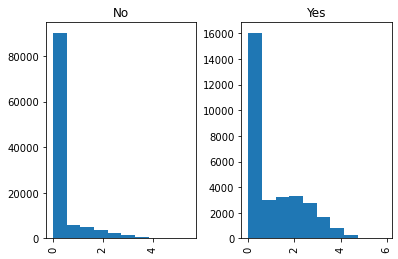

In [23]:
np.log1p(weather_data.Rainfall).hist(by=weather_data['RainTomorrow'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

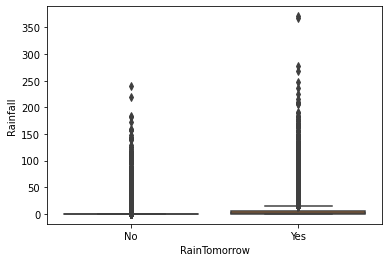

In [24]:
sns.boxplot(data=weather_data, y='Rainfall', x='RainTomorrow')

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

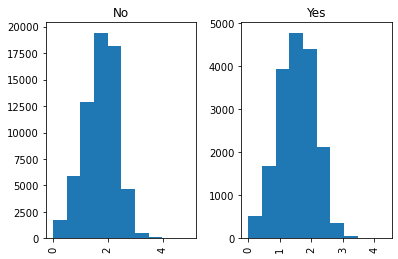

In [25]:
np.log1p(weather_data.Evaporation).hist(by=weather_data['RainTomorrow'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

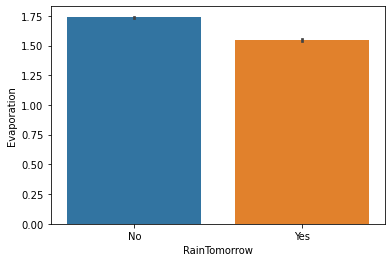

In [26]:
sns.barplot(y=np.log1p(weather_data.Evaporation), x=weather_data.RainTomorrow)

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

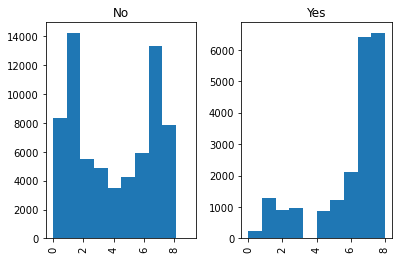

In [27]:
weather_data.Cloud9am.hist(by=weather_data['RainTomorrow'])

array([<AxesSubplot:title={'center':'Cloudy'}>,
       <AxesSubplot:title={'center':'Sun'}>], dtype=object)

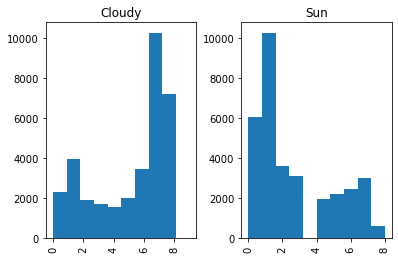

In [28]:
weather_data[weather_data['RainTomorrow']=='No'].Cloud9am.hist(by=sun)

За исключением разве что того, что в количестве осадков для сухого завтрашего дня появляются большие значения осадков
вчерашнего дня и наоборот, для дождливого завтрешнего дня появляются сухие вчерашние дни. Тем не менее, сохранение
взаимосвязей переменных с таргетной может говорить о том, что дождливые дни периодичны, то есть длятся периодами.

Посмотрим, какие направления ветров обещают нам дожди сегодня и завтра:

<AxesSubplot:>

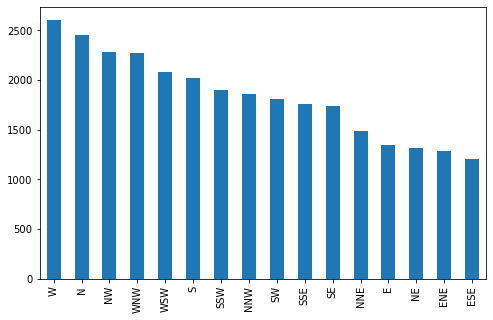

In [29]:
plt.figure(figsize=(8,5))
weather_data[weather_data.RainTomorrow=='Yes'].WindGustDir.value_counts().plot(kind="bar")

<AxesSubplot:>

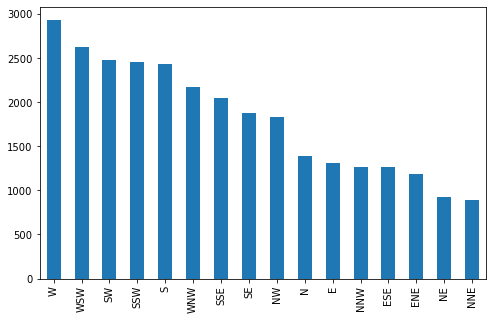

In [30]:
plt.figure(figsize=(8,5))
weather_data[weather_data.RainToday=='Yes'].WindGustDir.value_counts().plot(kind="bar")

Видим, что западные ветра чаще всего предвещают затяжные дожди, а восточные наоборот.
Также можно заметить, что северные ветра гораздо реже предвещают завтрашний дождь, что может характеризовать их, как
ветра, приносящие слабый циклон, не на долго задерживающийся в Австралии.

Также видим, что наиболее сильные ветра характерны как раз западным, которые дождевые, а наиболее слабые - восточным.

<AxesSubplot:xlabel='WindGustDir'>

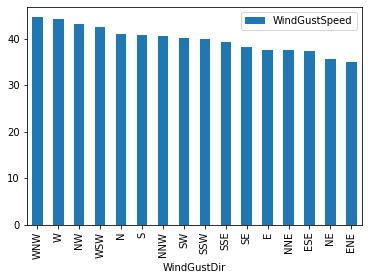

In [31]:
weather_data.groupby(['WindGustDir']).agg({'WindGustSpeed': np.mean}).sort_values(by='WindGustSpeed', ascending=False).plot(kind="bar")

Посмотрим, на распределения средних температур (в 9 утра, 3 дня, максимальная и минимальная за день) в зависимости от
месяца. Учитываем, что данные собраны в Австралии, где времена года инвертированы.

<AxesSubplot:xlabel='Month'>

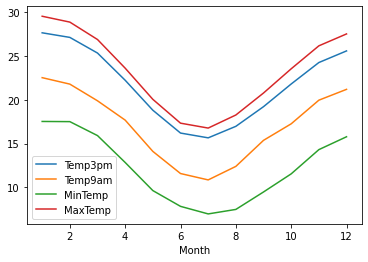

In [32]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

weather_data.groupby(weather_data.Date.dt.month).agg({'Temp3pm': np.mean,
                                                      'Temp9am': np.mean,
                                                      'MinTemp': np.mean,
                                                      'MaxTemp': np.mean}). \
                rename_axis(index={'Date': 'Month'}).plot(kind='line')

Построим аналогичные графики для влажности и давления.

<AxesSubplot:xlabel='Month'>

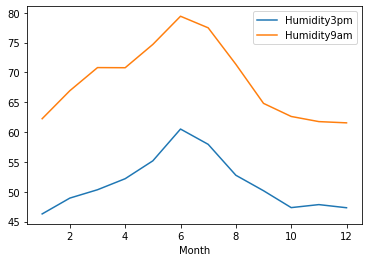

In [33]:
weather_data.groupby(weather_data.Date.dt.month).agg({'Humidity3pm': np.mean,
                                                  'Humidity9am': np.mean}). \
            rename_axis(index={'Date': 'Month'}).plot(kind='line')

<AxesSubplot:xlabel='Month'>

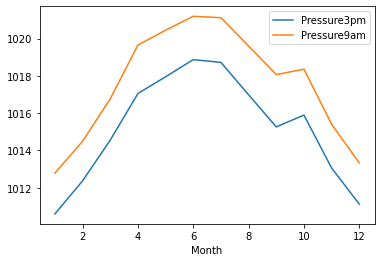

In [34]:
weather_data.groupby(weather_data.Date.dt.month).agg({'Pressure3pm': np.mean,
                                                  'Pressure9am': np.mean}). \
            rename_axis(index={'Date': 'Month'}).plot(kind='line')

Видим также вполне ожидаемые значения, летом (то есть зимой по Австралийски) давление увеличивается, так как плотность
воздуха возрастает, влажность вроде тоже должна была зимой увеличиться, что и произошло.

Построим распределения влажности для дождливых и сухих дней.

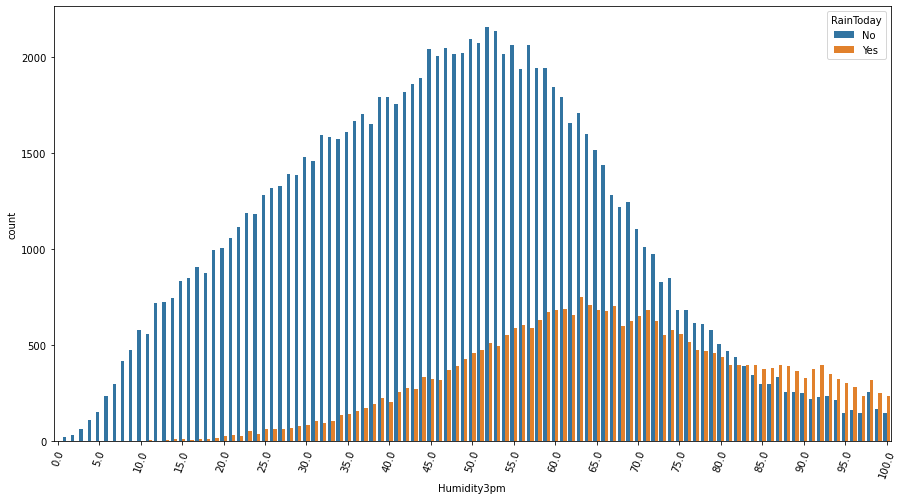

In [35]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=weather_data.Humidity3pm, hue=weather_data.RainToday)
max = int(weather_data.Humidity3pm.max())
ax.set_xticks(range(0, max+1,5))
plt.xticks(rotation=70)
plt.show()

Посмотрим, сохраняется ли это различие в выборочных средних, если брать разделение по таргетному значению - будет ли
дождь завтра.

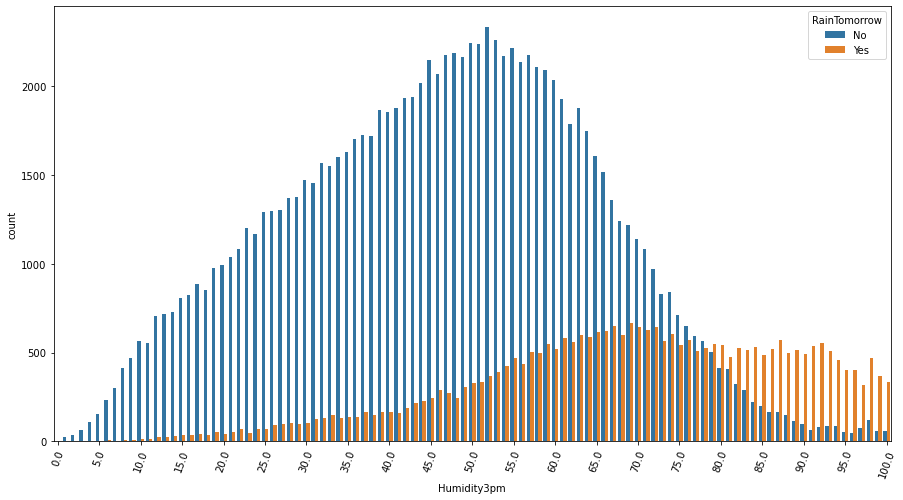

In [36]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=weather_data.Humidity3pm, hue=weather_data.RainTomorrow)
max = int(weather_data.Humidity3pm.max())
ax.set_xticks(range(0, max+1,5))
plt.xticks(rotation=70)
plt.show()

Видим, что выборочные средние различаются, но и распределение для дождливых дней перестало быть нормальным, естественным образом оно выходит на ассимптоту при повышении относительной
влажности, в таком случае обычно проводят не сравнение выборчных средних, а сравнение дов. интервалов
медиан распределений.

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

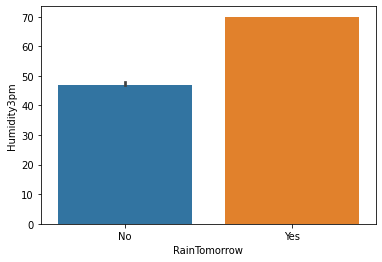

In [37]:
sns.barplot(y=weather_data.Humidity3pm, x=weather_data.RainTomorrow, estimator=np.median)

Видим, что доверительные интервалы не пересекаются, что говорит о статистически значимых различиях.
В данном случае распределение относительной влажности для дождливых дней имеет ненормальное распределение, и
одним из преимуществ метода бутстрэпа является то, что условие нормальности не является обязательным требованием к его
применению, как, например, в методе критерия Стъюдента, потому что мы можем сравнивать не только средние, но и медианы.

Построив такую же дистограмму по давлению, можем убедиться, что медиана давления ститистически значимо
не различиается при дождливых или сухих завтрешних днях:

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure3pm'>

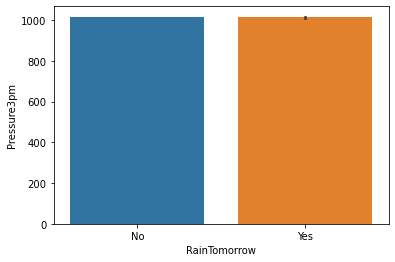

In [38]:
sns.barplot(y=weather_data.Pressure3pm, x=weather_data.RainTomorrow, estimator=np.median)

А вот у температуры днем и максимальной скорости ветра за день присутствуют статистически значимы различия:

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

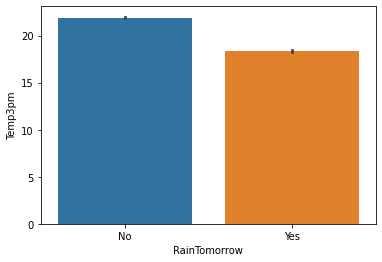

In [39]:
sns.barplot(y=weather_data.Temp3pm, x=weather_data.RainTomorrow, estimator=np.median)

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustSpeed'>

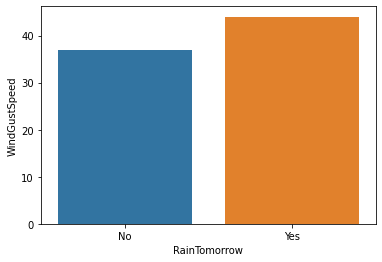

In [40]:
sns.barplot(y=weather_data.WindGustSpeed, x=weather_data.RainTomorrow, estimator=np.median)

Хотелось бы еще узнать, есть ли зависимость в количественных принаках от расположения метеостанции, построим такие же
дистограммы с дов. интервалами для температуры, давления, испарений и максимальной скорости ветра:

<AxesSubplot:xlabel='Location', ylabel='Temp3pm'>

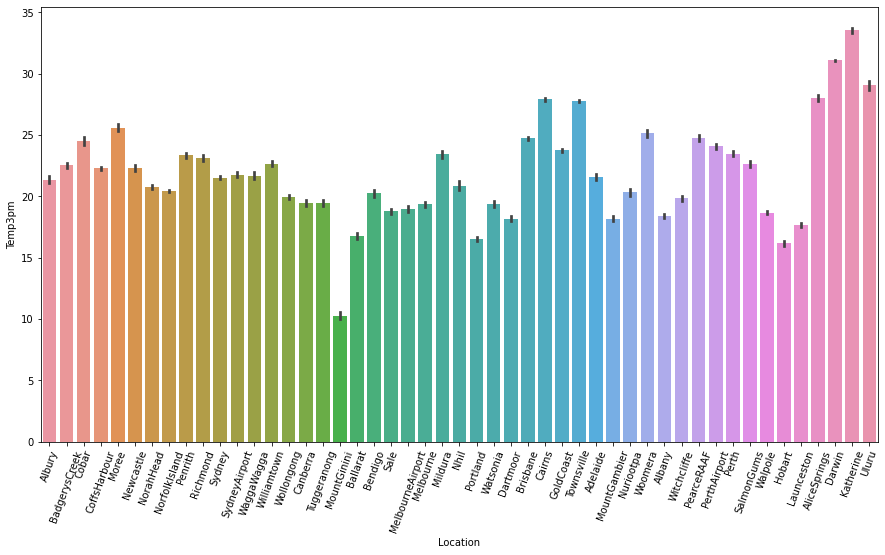

In [41]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
sns.barplot(y=weather_data.Temp3pm, x=weather_data.Location)

<AxesSubplot:xlabel='Location', ylabel='Pressure3pm'>

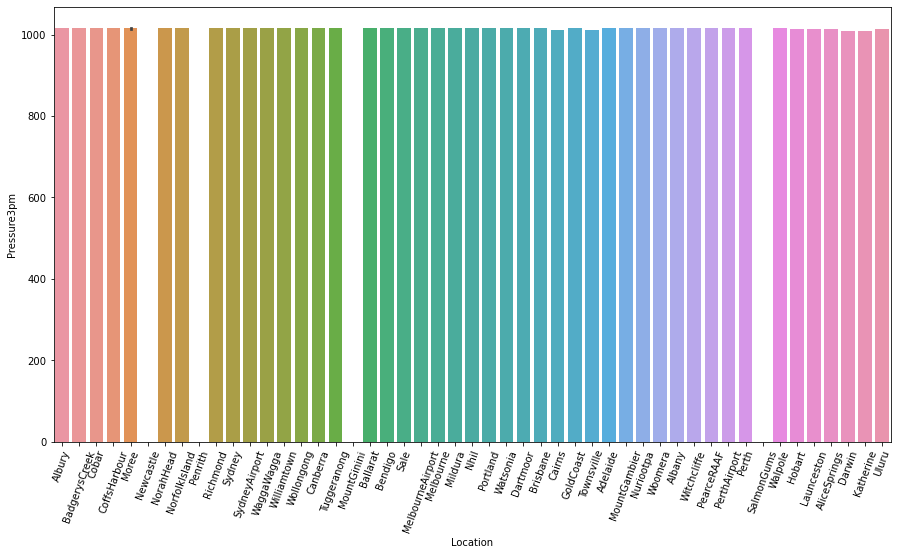

In [42]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
sns.barplot(y=weather_data.Pressure3pm, x=weather_data.Location)

<AxesSubplot:xlabel='Location', ylabel='Evaporation'>

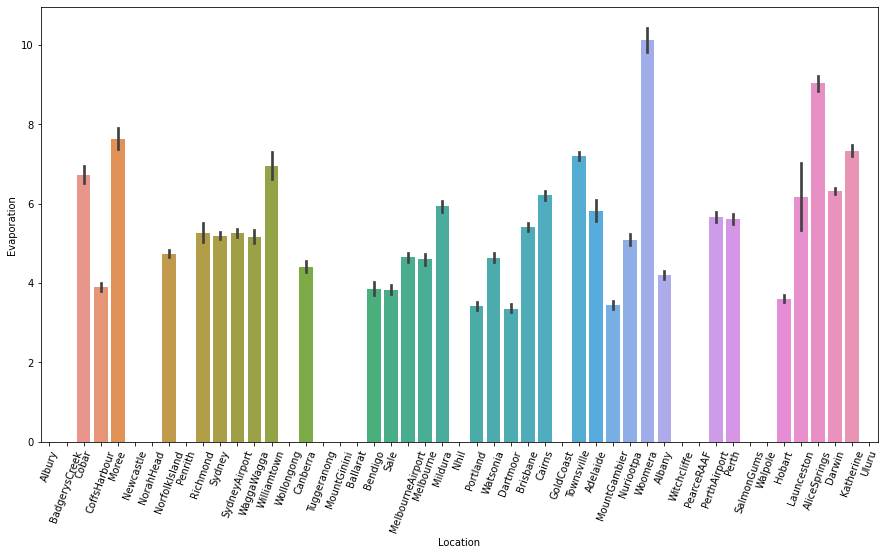

In [43]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
sns.barplot(y=weather_data.Evaporation, x=weather_data.Location)

<AxesSubplot:xlabel='Location', ylabel='WindGustSpeed'>

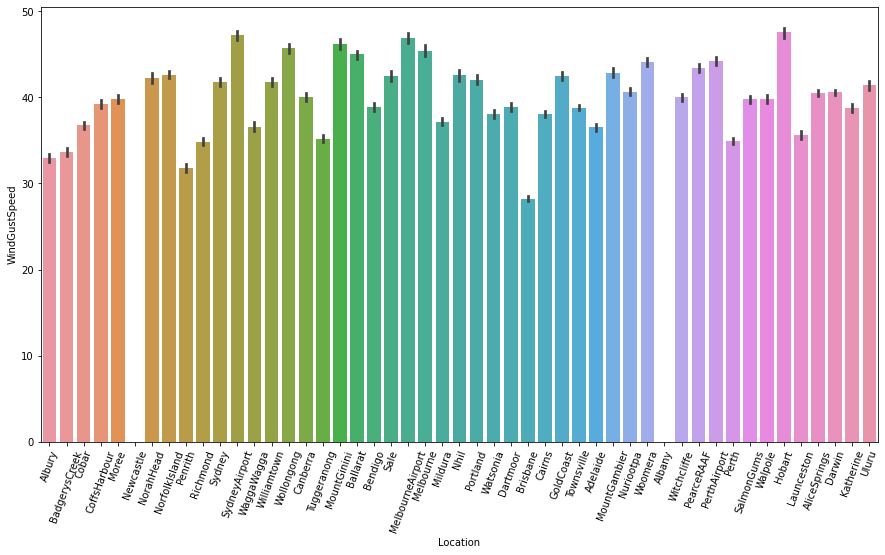

In [44]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
sns.barplot(y=weather_data.WindGustSpeed, x=weather_data.Location)

Видим несколько интересных моментов. Во-первых, выборочное среднее давления статистически значемо не различается в разных
локациях, во-вторых, для некоторых локаций просто не осуществлялся сбор показателей. Во всех остальных ситуациях наблюдаются
статистически значимые различия в выборочных средних признаков, что говорит о значимости месторасположения метеостанции в
предсказании погоды.

На последок построим диаграммы рассеивания для количественных переменных в зависимости от таргетного признака *RainTomorrow*

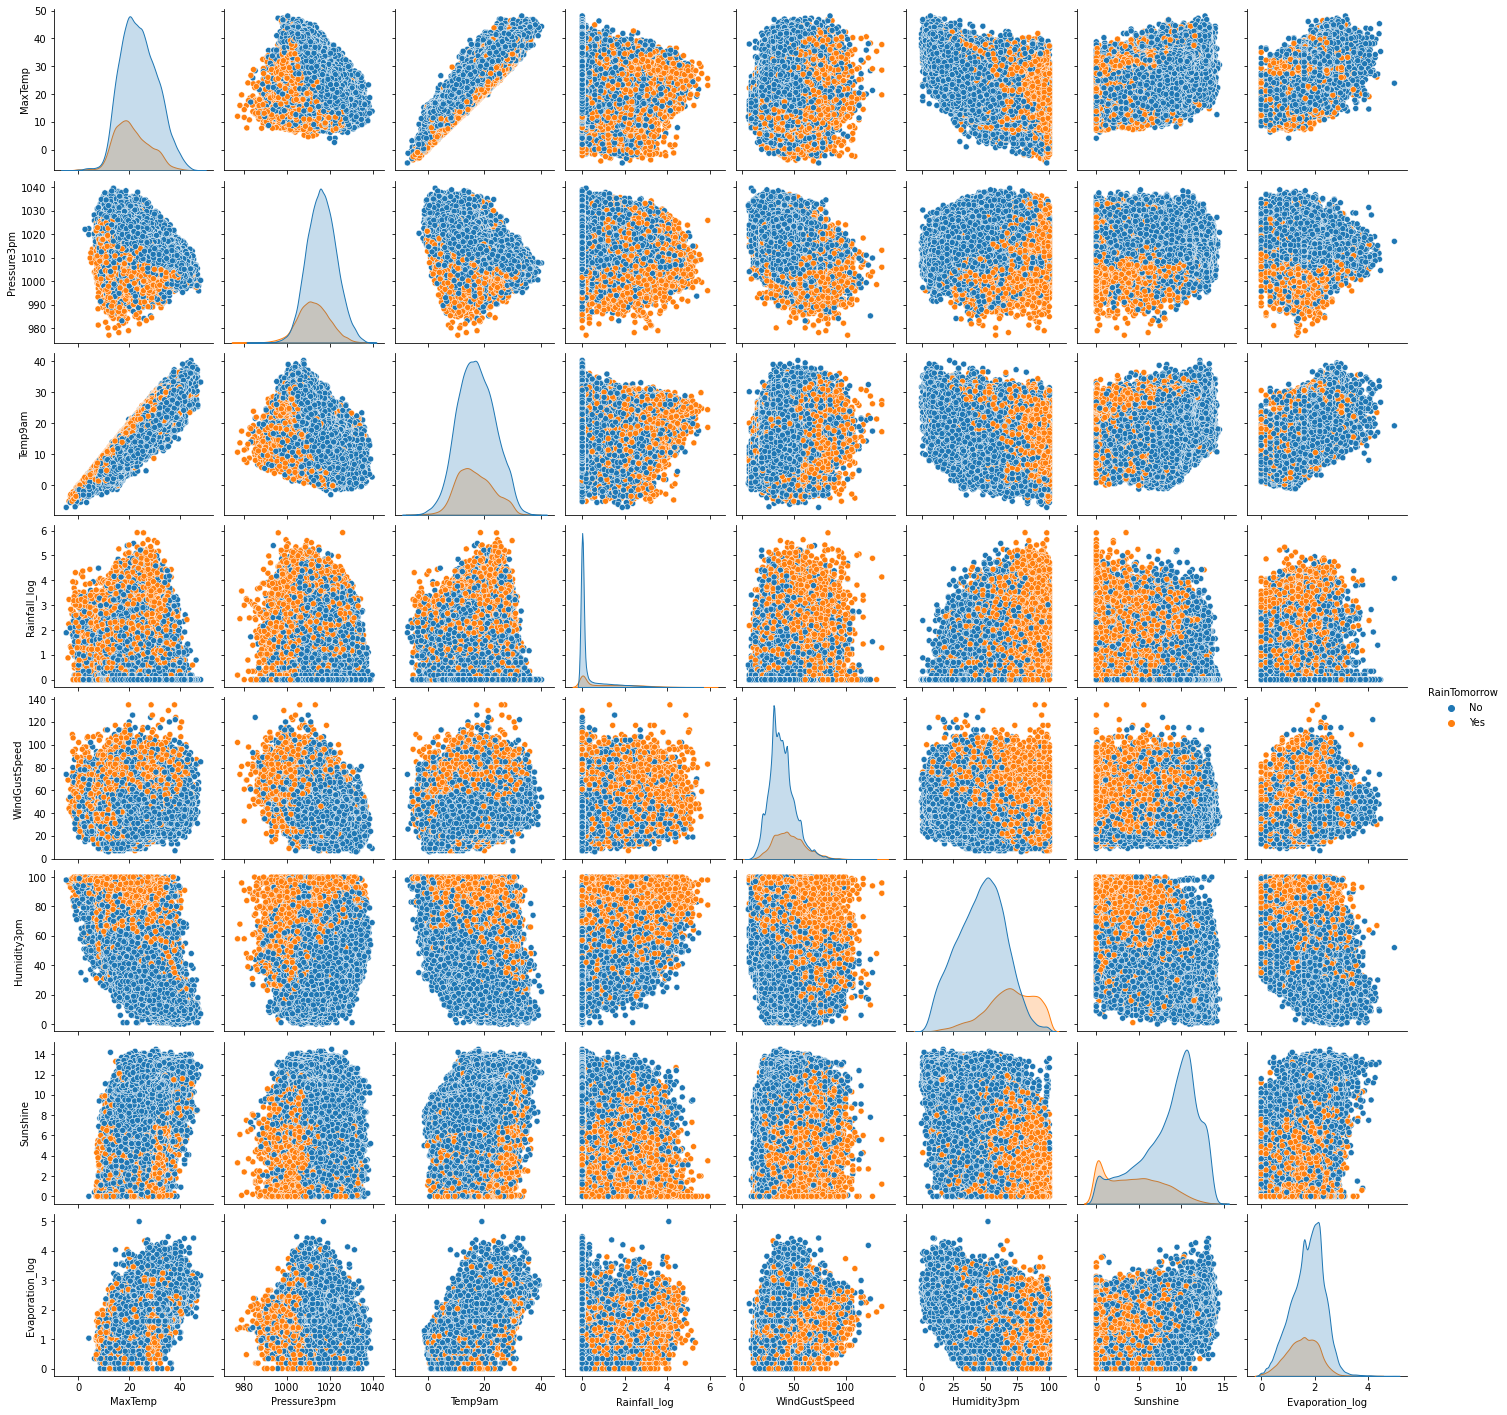

In [45]:
weather_data['Rainfall_log'] = np.log1p(weather_data.Rainfall)
weather_data['Evaporation_log'] = np.log1p(weather_data.Evaporation)
sns.pairplot(data=weather_data, vars=('MaxTemp','Pressure3pm', 'Temp9am', 'Rainfall_log', 'WindGustSpeed',
                                       'Humidity3pm', 'Sunshine', 'Evaporation_log'), hue='RainTomorrow' )

На диаграмме рассеивания можно пронаблюдать все ранее описанные зависимости от дождливых и сухих
завтрашних дней. Интересна еще ситуация с температурами, очевидно, что между максимальной температурой
и температурой в 9 утра (которая близка к минимальной температуре) присутствует корреляция, но
также можно заметить, что в дождливые завтрашние дни корреляция горазда сильнее и близка к единице, что
говорит о том, что в дождливые дни температура в целом не меняется в течении всего светового дня.

Также можно пронаблюдать небольшую корреляцию испарений и температуры, чем температура выше, тем
больше количество испарений, что логично. И небольшая корреляция между влажностью и температурой,
при высоких максимальных температурах влажность минимальна, и, следовательно, вероятность дождей
также минимальна, при понижении температры растет влажность и увеличивается вероятность, то есть
количество, дождливых дней.

Количество наблюдений (эквивалентно количеству дней) для каждой из локаций

<AxesSubplot:xlabel='Location', ylabel='count'>

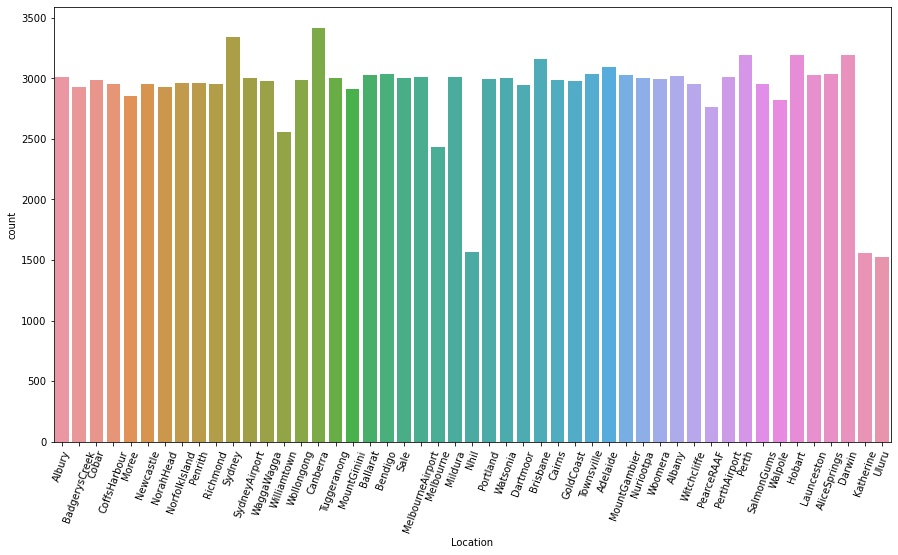

In [46]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
sns.countplot(data=weather_data, x='Location')

В целом, по данному анализу можно сделать основной вывод, что интуитивно понятные и очевидные
взаимосвязи различных погодных характеристик в зависимости от дождливых или сухих сегодняшних дней
можно экстраполировать на день завтрашний. Статистическая значимость этих взаимосвязей сохраняется, хоть
и теряет некоторую свою силу.
По данному набору данных есть недочеты связанные с тем, что данные получены с различных
локаций, как ранее было показано, эти различия в местоположении метеостанций статистически значимо влияют
на собранные показания. При этом на некоторых локациях определенные показания вообще не собирались, а в некоторых
были собраны наблюдения за какой то относительно небольшой промежуток времени.

